[ 10.  15.  20.  25.  30.  35.  40.  45.  50.]
[ 10.  15.  20.  25.  30.  35.  40.  45.  50.]


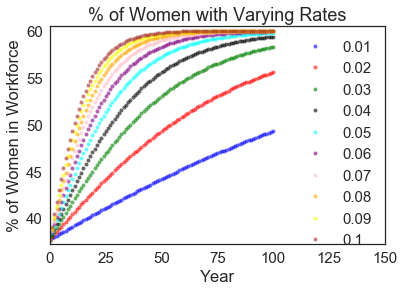

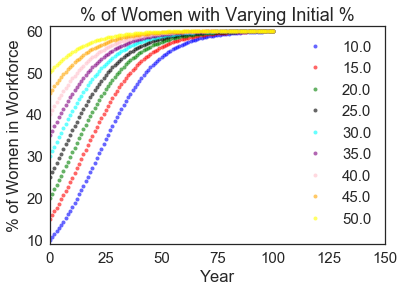

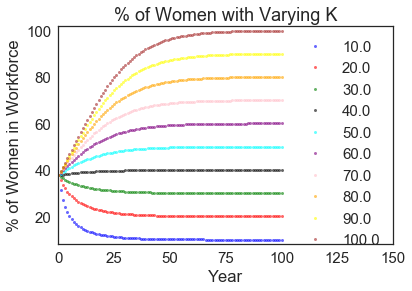

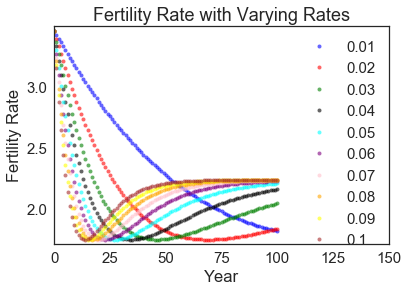

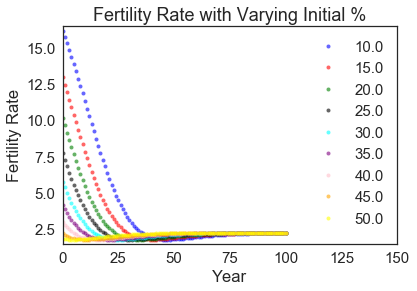

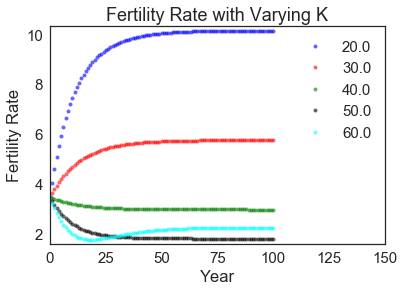

In [34]:
%matplotlib inline

from modsim import *
from pandas import *
import csv


file = open('data/data.csv')
data = csv.reader(file)

model_system = System()
array = ['blue', 'red', 'green', 'black', 'cyan', 'purple', 'pink', 'orange', 'yellow', 'brown']

#plots the sample data
def plot_data(data, new = True):
    counter = 0
    if (new):
        newfig()
    decorate(xlabel = 'time',
            ylabel = '% of women in the workforce')
    for i in data:
        if (counter > 0):
            plot(float(i[0]), float(i[1]), 'go', label='data')
        counter += 1

#plots the results as well as the sample data on a new or used graph
def plot_results(system, color = 'gray', label = 'model', title=None, new = True):
    """Plot the estimates and the model.

    system: System object with `results`
    """
    #plot_data(data, new)
    plot(system.results, '--', color = color, label = label)
    decorate(xlabel='Year', 
             ylabel='% of women in workforce',
             title=title)
    
#a logistic simulation
def iterative_logistic(system):
    k = system.k
    r = system.r
    a = (k - system.p0) / system.p0
    results = TimeSeries()
    for t in linrange(system.t0, system.t_end):
        
        results[t] = k / (1 + a*exp(-r * (t - system.t0)))
                          
    system.results = results
    
def run_simulationp1():
    p0 = float(input('Input initial % of women in the workforce. Select a value between 10 and 50.'))
    r = float(input('Input rate of change of % of women in the workforce. Select a value between 0.01 and 0.1.'))
    t_end = float(input('Input desired number of simulated years. Select a value under 400.'))
    system = System(t0 = 0, p0 = 37.7, t_end = 100, k = 60, r = 0.075) #users can input values from 0.05 to 0.1
    if p0 < 400 and p0 > 0:
        system.p0 = p0
    if r > 0.01 and r < 0.1:
        system.r = r
    if t_end < 400 and t_end > 0:
        system.t_end = t_end
    iterative_logistic(system)
    newfig()
    plot_results(system, color = 'blue', label = 'logistic', title = '% of women in the workforce vs. time', new = False)
    return system
    
def rsweep():
    newfig()
    i = 0
    r_array = linrange(0.01, 0.1, 0.01)
    system2 = System(t0 = 0, p0 = 37.7, t_end = 100, k = 60, r = 0.075)
    for r in r_array:
        system2.r = r
        iterative_logistic(system2)
        plot(system2.results, 'o', color = array[i], markersize= 4, label = r)
        i += 1
        
    decorate(xlim = [0, 150], xlabel='Year', ylabel='% of Women in Workforce', title= '% of Women with Varying Rates')

def p0sweep():
    newfig()
    i = 0 
    p0_array = linrange(10, 50, 5)
    print(p0_array)
    system3 = System(t0 = 0, p0 = 37.7, t_end = 100, k = 60, r = 0.075)
    for p0 in p0_array:
        system3.p0 = p0
        iterative_logistic(system3)
        #print(system3.results)
        plot(system3.results, 'o', color = array[i], markersize= 4, label = p0)
        i += 1
    decorate(xlim = [0, 150], xlabel='Year', ylabel='% of Women in Workforce', title= '% of Women with Varying Initial %')
    
def ksweep():
    newfig()
    k_array = linrange(10, 100, 10)
    system4 = System(t0 = 0, p0 = 37.7, t_end = 100, k = 60, r = 0.075)
    i = 0
    for k in k_array:
        system4.k = k
        iterative_logistic(system4)
        plot(system4.results, 'o', color = array[i], markersize = 3, label = k)
        i += 1
    decorate(xlim = [0, 150], xlabel='Year', ylabel='% of Women in Workforce', title= '% of Women with Varying K')
            
    
def run_simulationp2():
    #takes system.results and inputs the y-values into the equation modeling f-rate to %. The result should be f-rate for a given time. Plot the new pairs of data.
    system4 = run_simulationp1()
    results2 = TimeSeries()
    for t in linrange(system4.t0, system4.t_end):
        x = system4.results[t]
        results2[t] = 0.0081*(x**2) - 0.8461*x + 23.841
                          
    system4.results2 = results2
    newfig()
    plot(system4.results2, 'o', color = 'blue', markersize = 4)
    decorate(xlabel='Year', ylabel='Fertility Rate', title= 'Fertility Rate vs. Time')

def rsweep2():
    newfig()
    r_array = linrange(0.01, 0.1, 0.01)
    system2 = System(t0 = 0, p0 = 37.7, t_end = 100, k = 60, r = 0.075)
    i = 0
    for r in r_array:
        system2.r = r
        iterative_logistic(system2)
        results2 = TimeSeries()
        for t in linrange(system2.t0, system2.t_end):
            x = system2.results[t]
            results2[t] = 0.0081*(x**2) - 0.8461*x + 23.841
        system2.results2 = results2
        plot(system2.results2, 'o', color = array[i], markersize= 4, label = r)
        i += 1
    decorate(xlim = [0, 150], xlabel='Year', ylabel='Fertility Rate', title= 'Fertility Rate with Varying Rates')
    
def p0sweep2():
    newfig()
    p0_array = linrange(10, 50, 5)
    print(p0_array)
    system3 = System(t0 = 0, p0 = 37.7, t_end = 100, k = 60, r = 0.075)
    i = 0
    for p0 in p0_array:
        system3.p0 = p0
        iterative_logistic(system3)
        results2 = TimeSeries()
        for t in linrange(system3.t0, system3.t_end):
            x = system3.results[t]
            results2[t] = 0.0081*(x**2) - 0.8461*x + 23.841
        system3.results2 = results2
        plot(system3.results2, 'o', color = array[i], markersize= 4, label = p0)
        i += 1
    decorate(xlim = [0, 150], xlabel='Year', ylabel='Fertility Rate', title= 'Fertility Rate with Varying Initial %')
    
def ksweep2():
    newfig()
    k_array = linrange(20, 60, 10)
    system4 = System(t0 = 0, p0 = 37.7, t_end = 100, k = 60, r = 0.075)
    i = 0
    for k in k_array:
        system4.k = k
        iterative_logistic(system4)
        results2 = TimeSeries()
        for t in linrange(system4.t0, system4.t_end):
            x = system4.results[t]
            results2[t] = 0.0081*(x**2) - 0.8461*x + 23.841
        system4.results2 = results2
        plot(system4.results2, 'o', color = array[i], markersize= 4, label = k)
        i += 1
    decorate(xlim = [0, 150], xlabel='Year', ylabel='Fertility Rate', title= 'Fertility Rate with Varying K')

#run_simulationp1()
rsweep()
p0sweep()
ksweep()
#run_simulationp2()
rsweep2()
p0sweep2()
ksweep2()